## How good is my profile to get a good college in MS?

## This is probably a question that every aspiring MS aspirant wants to know. Is my profile good enough to get a good college? Being an aspirant myself even I also have so many doubts, whether my CGPA is good enough, how should I write a solid SOP, etc.

# Therefore this kernel will mainly have the following two sections
# EDA
### Understanding the important factors
### Visualisation
### Predictve Modelling


# At first, Cleaning the Data

In [351]:
# Cleaning The data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
df= pd.read_csv('Admission_Predict.csv')
#df.head()
print(df.isnull().sum())
print(df.dtypes)

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64
Serial No.             int64
GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object


## Analysis 1 : What is the relation between GRE Score and Chance of admit

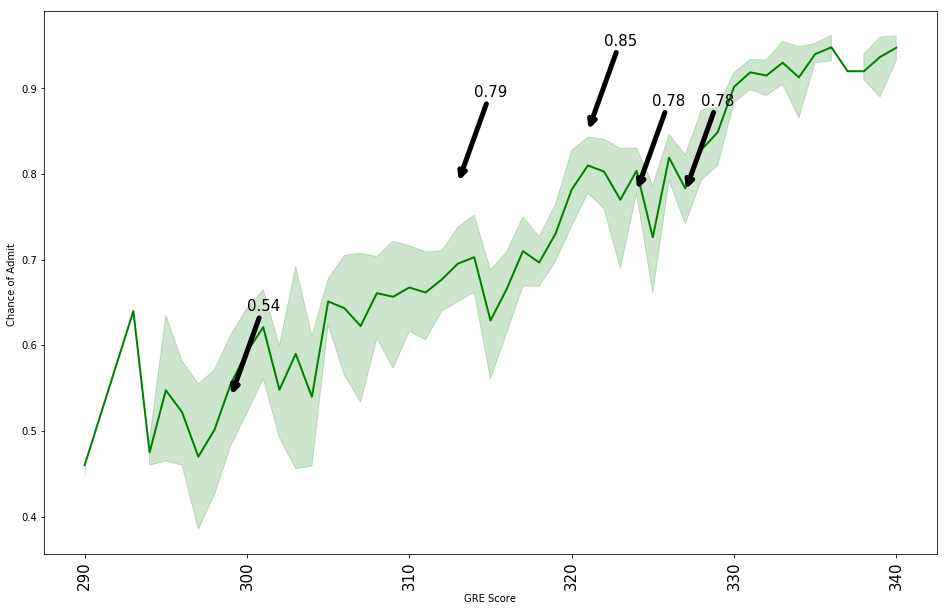

In [353]:
df1= pd.read_csv('Admission_Predict.csv',usecols=['GRE Score','Chance of Admit '])
rand = df1.sample(n=5)
#print(rand)
plt.figure(figsize=(16,10))
sns.lineplot(x=df1['GRE Score'],y=df1['Chance of Admit '],linewidth=2.0,color='green')
plt.xticks(rotation=90,fontsize=15)
a=rand['GRE Score'].reset_index(drop=True)
b=rand['Chance of Admit '].reset_index(drop=True)
for i in range(0,len(a)):
    plt.annotate(str(b[i]),xy=(a[i],b[i]),xytext=(a[i]+2,b[i]+0.1),ha='center',arrowprops=(dict(arrowstyle='->',lw=5)),fontsize=15)
plt.show()


##  This proves that GRE Score is directly proportional to Chance Of Admit. So,getting GRE marks improves the chance of getting an admit in US colleges 

## Now it's time to figure out the relation between GRE Score and CGPA

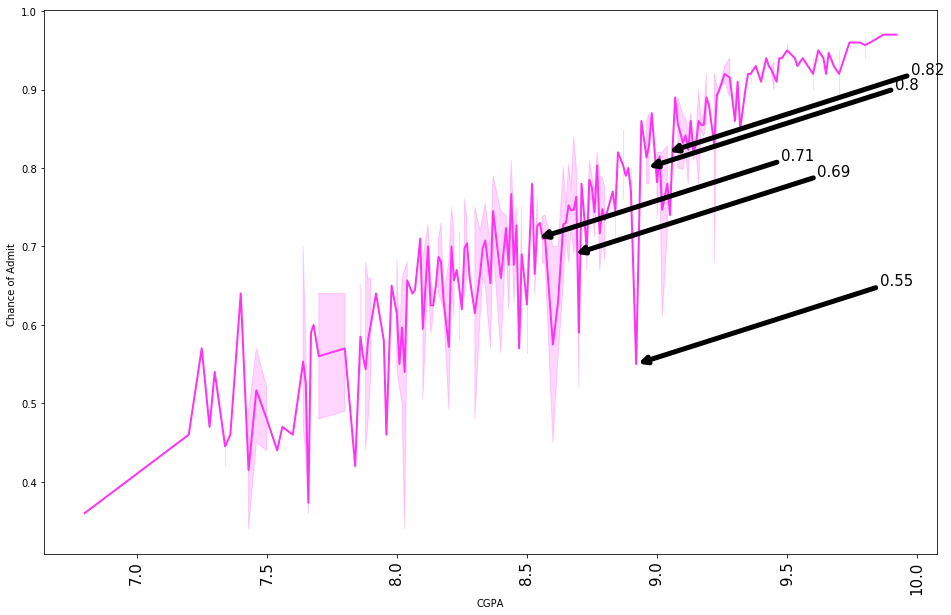

In [357]:
df2= pd.read_csv('Admission_Predict.csv',usecols=['Chance of Admit ','CGPA'])
rand = df2.sample(n=5)
#print(rand)
plt.figure(figsize=(16,10))
sns.lineplot(x=df2['CGPA'],y=df2['Chance of Admit '],linewidth=2.0,color='#FF33F5')
plt.xticks(rotation=90,fontsize=15)
a=rand['CGPA'].reset_index(drop=True)
b=rand['Chance of Admit '].reset_index(drop=True)
for i in range(0,len(a)):
    plt.annotate(str(b[i]),xy=(a[i],b[i]),xytext=(a[i]+1,b[i]+0.1),ha='center',arrowprops=(dict(arrowstyle='->',lw=5)),fontsize=15)
plt.show()

### To find the correlation and statistical summary of the dataset

In [359]:
df.corr()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,1.000000,-0.097526,-0.147932,-0.169948,-0.166932,-0.088221,-0.045608,-0.063138,0.042336
GRE Score,-0.097526,1.000000,0.835977,0.668976,0.612831,0.557555,0.833060,0.580391,0.802610
TOEFL Score,-0.147932,0.835977,1.000000,0.695590,0.657981,0.567721,0.828417,0.489858,0.791594
University Rating,-0.169948,0.668976,0.695590,1.000000,0.734523,0.660123,0.746479,0.447783,0.711250
SOP,-0.166932,0.612831,0.657981,0.734523,1.000000,0.729593,0.718144,0.444029,0.675732
LOR,-0.088221,0.557555,0.567721,0.660123,0.729593,1.000000,0.670211,0.396859,0.669889
CGPA,-0.045608,0.833060,0.828417,0.746479,0.718144,0.670211,1.000000,0.521654,0.873289
Research,-0.063138,0.580391,0.489858,0.447783,0.444029,0.396859,0.521654,1.000000,0.553202
Chance of Admit,0.042336,0.802610,0.791594,0.711250,0.675732,0.669889,0.873289,0.553202,1.000000


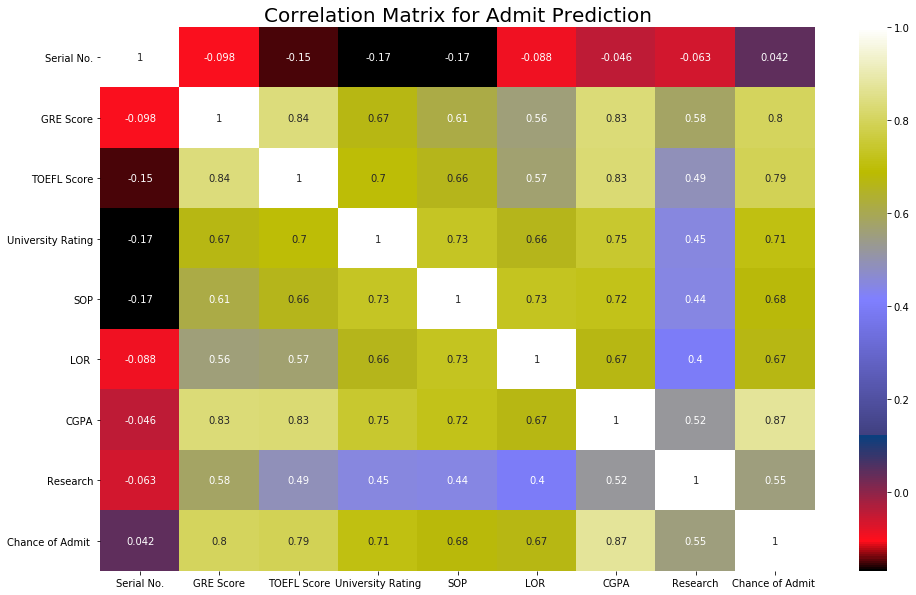

In [220]:
plt.figure(figsize=(16,10))
sns.heatmap(df.corr(),cmap='gist_stern',annot=True)
plt.title('Correlation Matrix for Admit Prediction',fontsize=20)
plt.show()

## The above analysis proves that CGPA has the most impact in getting admit to US colleges,since the correlation_value is highest.Next comes GRE Score,then TOEFL Score
## In a nutshell, the parameters which impacts the most for getting an admit in US colleges are as follows:
##    CGPA > GRE Score > TOEFL Score > University Rating > SOP > LOR > Research

# Below Analysis is to show which factors have a bigger influence on securing and admit .

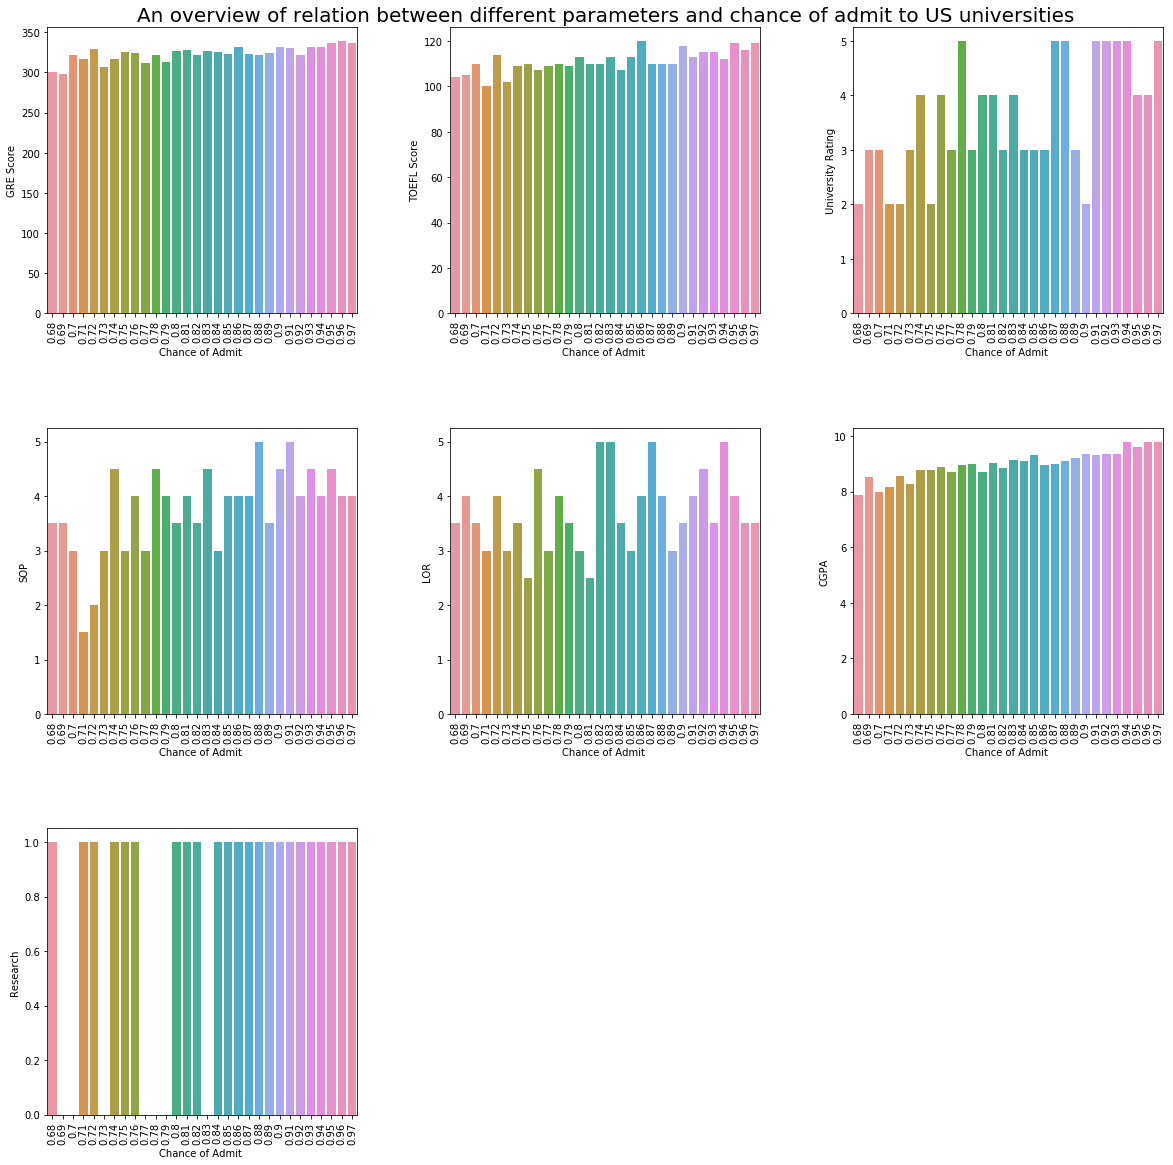

In [313]:
df = df.sort_values(by='Chance of Admit ',ascending=False,axis=0)
df.drop_duplicates(subset=['Chance of Admit '],inplace=True)
k=df.columns[1:-1]
fig= plt.figure(figsize=(20,20))
fig.subplots_adjust(hspace=0.4,wspace=0.3)
for i in range(1,8):
    ax=fig.add_subplot(3,3,i)
    ax= sns.barplot(x=df['Chance of Admit '][0:30],y=df[k[i-1]][0:30])
    plt.xticks(rotation=90)
    #plt.show()
    if i ==2:
        plt.title('An overview of relation between different parameters and chance of admit to US universities',fontsize=(20))
#plt.tight_layout()

## There is a clear trend that having GRE,TOEFL and CGPA at higher level gives you more chance of securing an admit. A good SOP may just enhance your chance but it's never secured.Research has an outside chance as the graph is sporadic.

# Does a research posess an outside chance of getting acceptance from US universities

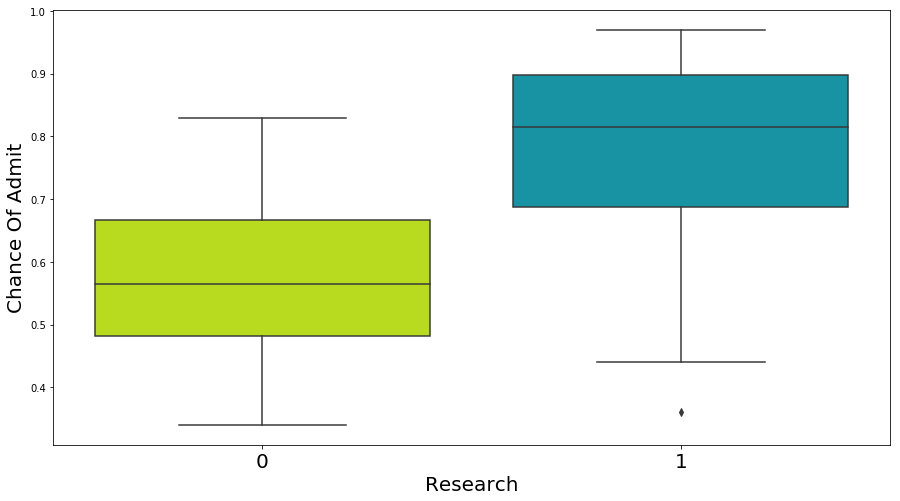

In [331]:
dfNew = df[['Research','Chance of Admit ']]
dfNew
plt.figure(figsize=(15,8))
sns.boxplot(x=dfNew['Research'],y=dfNew['Chance of Admit '],palette='nipy_spectral_r')
plt.xticks(fontsize=20)
plt.yticks(fontsize=10)
plt.xlabel('Research',fontsize=20)
plt.ylabel('Chance Of Admit',fontsize=20)
plt.show()

# The above Analysis shows that research does alleviate your chances of getting an acceptance in US University

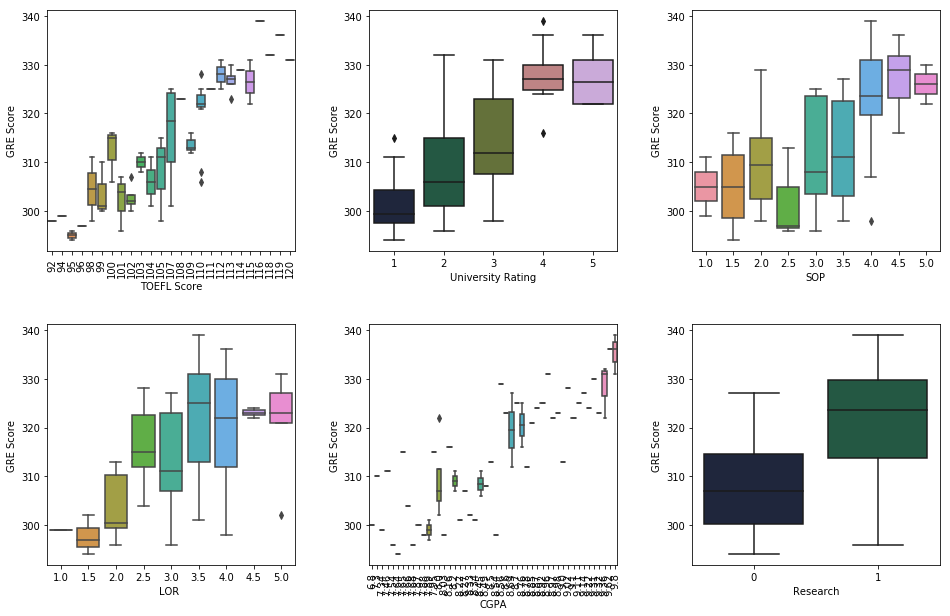

In [350]:

fig = plt.figure(figsize=(16,16))
fig.subplots_adjust(wspace=0.3,hspace=0.3)
for i in range(1,7):
    ax=fig.add_subplot(3,3,i)
    ax=sns.boxplot(x=df[df.columns[i+1]],y=df['GRE Score'])
    if i==1 or i== 5 :
        plt.xticks(rotation=90)

# The above trend shows that the person who has higher GRE score tends to acheive greater SOP,LOR,CGPA marks and research done. Although this is not completely true in case of University Rating. Research shows that students who get high marks in GRE tends to go to the lower ranked colleges. But this is paradoxical